## Modeling a Single Neuron

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.optimize import curve_fit

sns.set(style="whitegrid")
plt.rc('text')
plt.rc('font', family='serif')

LABELSIZE = 21
TICKSIZE = 19

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\magggien\AppData\Local\Temp\ipykernel_15896\4004203910.py:1: SyntaxWarning: invalid escape sequence '\d'
  spike_times = np.loadtxt('..\data\Data_neuron.txt')


Number of spikes: 30165
Number of intervals: 30164
Range of spike times: 2.01 to 359978.54 ms
Min interval: 1.900 ms
Max interval: 101.580 ms
Mean interval: 11.934 ms


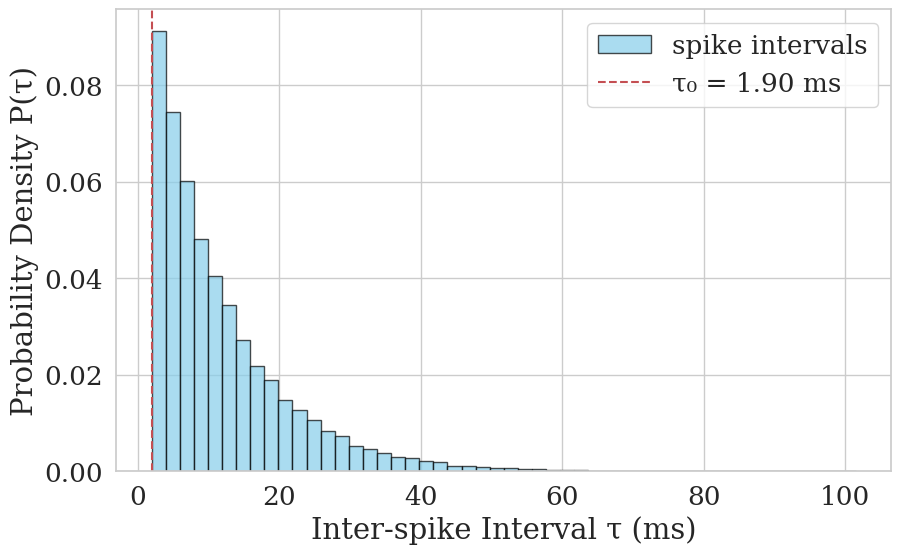

In [3]:
spike_times = np.loadtxt('..\data\Data_neuron.txt')
intervals = np.diff(spike_times)
tau_0 = np.min(intervals)
print(f"Number of spikes: {len(spike_times)}")
print(f"Number of intervals: {len(intervals)}")
print(f"Range of spike times: {spike_times[0]} to {spike_times[-1]} ms")
print(f"Min interval: {np.min(intervals):.3f} ms")
print(f"Max interval: {np.max(intervals):.3f} ms")
print(f"Mean interval: {np.mean(intervals):.3f} ms")

# Plot the distribution of interspike intervals
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(intervals, bins=50, density=True, alpha=0.7, 
                         color='skyblue', edgecolor='black',label='spike intervals')
plt.xlabel('Inter-spike Interval τ (ms)',fontsize=LABELSIZE)
plt.ylabel('Probability Density P(τ)',fontsize=LABELSIZE)
plt.xticks(fontsize=TICKSIZE)
plt.yticks(fontsize=TICKSIZE)
# plt.title('Distribution of Inter-spike Intervals', fontsize=LABELSIZE)
plt.axvline(tau_0, color='r', linestyle='--', label=f'τ₀ = {tau_0:.2f} ms')
plt.legend(fontsize=TICKSIZE)
plt.savefig('..\\results\\neuron_model\\interspike_intervals.pdf', dpi=300, bbox_inches='tight')

Fitted amplitude: 0.0999 ± 0.0003
Fitted decay rate (λ): 0.0999 ± 0.0005 ms⁻¹


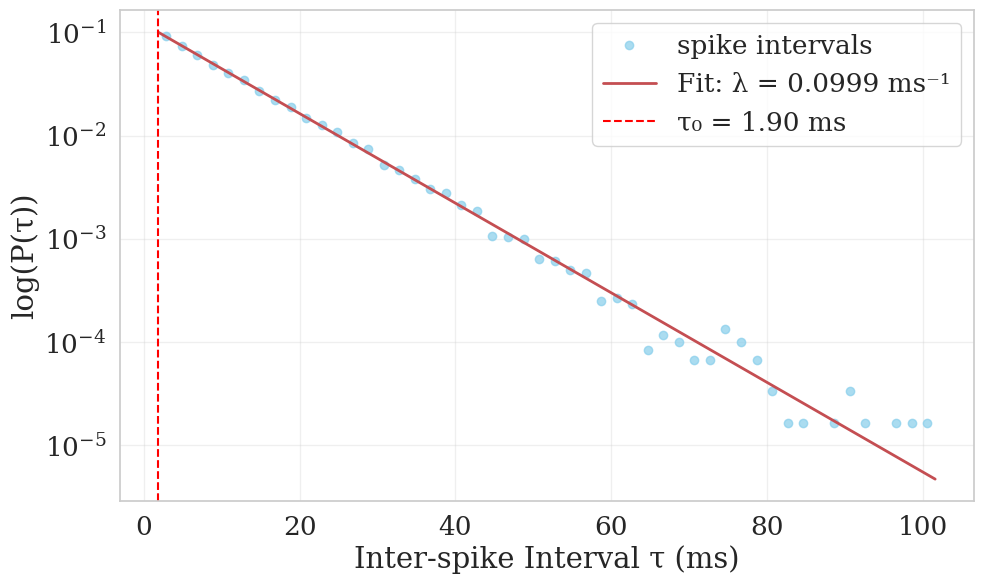

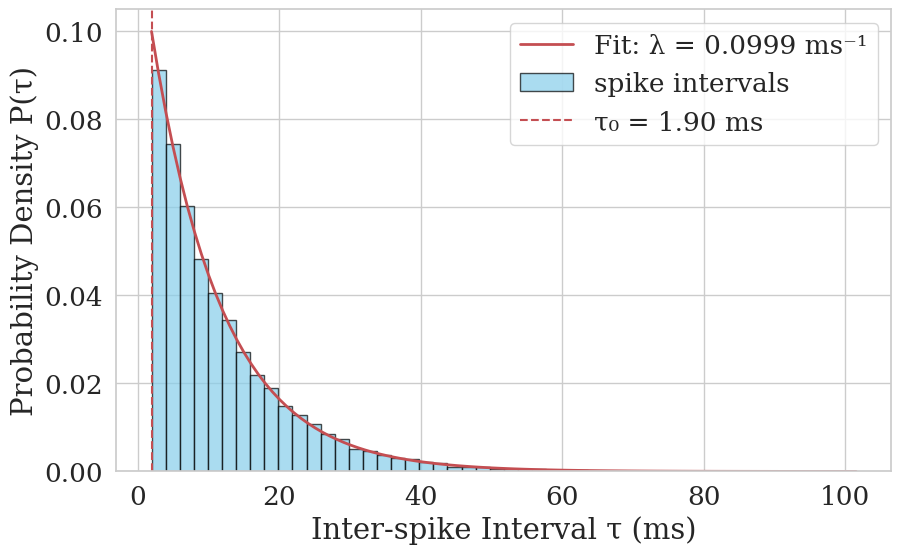

In [4]:
# Fit exponential function for τ > τ₀
def exp_func(x, a, lambda_val):
    return a * np.exp(-lambda_val * (x - tau_0)) #amplitude, tau_0 refractory period, lamba_val is the decay rate

# Get bin centers for fitting
bin_centers = (bins[:-1] + bins[1:]) / 2
valid_indices = bin_centers > tau_0
x_data = bin_centers[valid_indices]
y_data = hist[valid_indices]

# Initial guess for parameters (amplitude and decay rate)
p0 = [max(y_data), 0.1]
    
# Fit the curve
popt, pcov = curve_fit(exp_func, x_data, y_data, p0=p0)
a_fit, lambda_fit = popt
perr = np.sqrt(np.diag(pcov))  # Standard errors on parameters

print(f"Fitted amplitude: {a_fit:.4f} ± {perr[0]:.4f}")
print(f"Fitted decay rate (λ): {lambda_fit:.4f} ± {perr[1]:.4f} ms⁻¹")

# Plot the distribution and the fit on semi-log scale
plt.figure(figsize=(10, 6))
plt.semilogy(bin_centers, hist, 'o', alpha=0.7, color='skyblue', label='spike intervals')
x_fit = np.linspace(tau_0, max(intervals), 100)
y_fit = exp_func(x_fit, a_fit, lambda_fit)
plt.semilogy(x_fit, y_fit, 'r-', linewidth=2, label=f'Fit: λ = {lambda_fit:.4f} ms⁻¹')
plt.axvline(tau_0, color='red', linestyle='--', 
            label=f'τ₀ = {tau_0:.2f} ms')
plt.xlabel('Inter-spike Interval τ (ms)', fontsize=LABELSIZE)
plt.ylabel('log(P(τ))', fontsize=LABELSIZE)
plt.xticks(fontsize=TICKSIZE)
plt.yticks(fontsize=TICKSIZE)
plt.legend(fontsize=TICKSIZE)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('..\\results\\neuron_model\\log_decay.pdf', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(x_fit, y_fit, 'r-', linewidth=2,
         label=f'Fit: λ = {lambda_fit:.4f} ms⁻¹')
hist, bins, _ = plt.hist(intervals, bins=50, density=True, alpha=0.7, 
                         color='skyblue', edgecolor='black',label='spike intervals')
plt.xlabel('Inter-spike Interval τ (ms)',fontsize=LABELSIZE)
plt.ylabel('Probability Density P(τ)',fontsize=LABELSIZE)
plt.xticks(fontsize=TICKSIZE)
plt.yticks(fontsize=TICKSIZE)
plt.axvline(tau_0, color='r', linestyle='--', label=f'τ₀ = {tau_0:.2f} ms')
plt.legend(fontsize=TICKSIZE)
plt.savefig('..\\results\\neuron_model\\not_log_decay.pdf', dpi=300, bbox_inches='tight')

In [5]:
lambda_val = 0.0999  # ms^-1
tau_0 = 1.90  # ms
spike_times = [0]  # First spike at time 0

for i in range(999): 
    # Generate interval from exponential distribution and add refractory period
    interval = np.random.exponential(1/lambda_val) + tau_0
    next_spike = spike_times[-1] + interval
    spike_times.append(next_spike)


In [8]:
#FROM THE DATA
total_time_period = spike_times[-1] - spike_times[0]  # Last time minus first time
average_rate = len(spike_times) / (total_time_period )  # spikes/s
# ANALYTICAL SOLUTION 
average_analytical_rate = 1 / (tau_0 + 1/lambda_val)  # Spikes/ms
average_rate, average_analytical_rate

(0.08141473733156374, 0.08396298568679032)

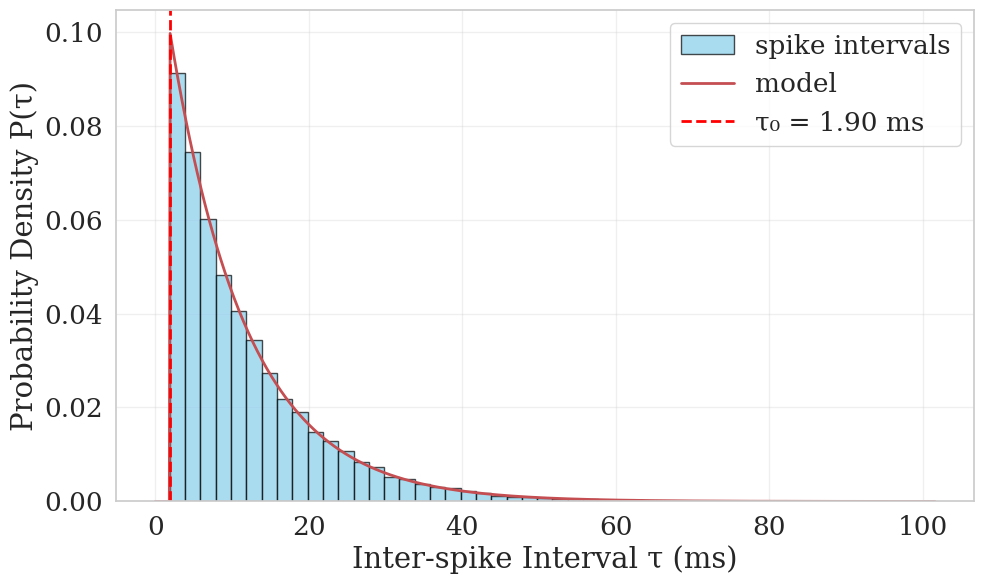

In [9]:
# Plot the distribution and the model
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(intervals, bins=50, density=True, alpha=0.7, 
                         color='skyblue', edgecolor='black',label='spike intervals')

x_model = np.linspace(0, max(intervals), 1000)
y_model = np.zeros_like(x_model)

# Apply the delayed Poisson model
y_model[x_model < tau_0] = 0
y_model[x_model >= tau_0] = lambda_fit * np.exp(-lambda_fit * (x_model[x_model >= tau_0] - tau_0))

plt.plot(x_model, y_model, 'r-', linewidth=2, 
         label=f'model')

plt.xlabel('Inter-spike Interval τ (ms)',fontsize=LABELSIZE)
plt.ylabel('Probability Density P(τ)',fontsize=LABELSIZE)
plt.xticks(fontsize=TICKSIZE)
plt.yticks(fontsize=TICKSIZE)
plt.axvline(tau_0, color='red', linestyle='--', linewidth=2, label=f'τ₀ = {tau_0:.2f} ms')
plt.legend(fontsize=TICKSIZE)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('..\\results\\neuron_model\\data_vs_model.pdf', dpi=300, bbox_inches='tight')
plt.show()